In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as  pd
import os
import cv2

import pyOpenLPT as lpt
redirector = lpt.PythonStreamRedirector()

%matplotlib widget

from fileIO import *

414.76471444551214 [-0.93911467  0.34359659  0.00223887]
2.015638089238594e-14 [127.77992248   0.           0.        ]


(98.85286724478073,
 403.3525222145922,
 -223.5056992882017,
 80.99395568160982,
 -114.65167318006905,
 113.72306804728959)

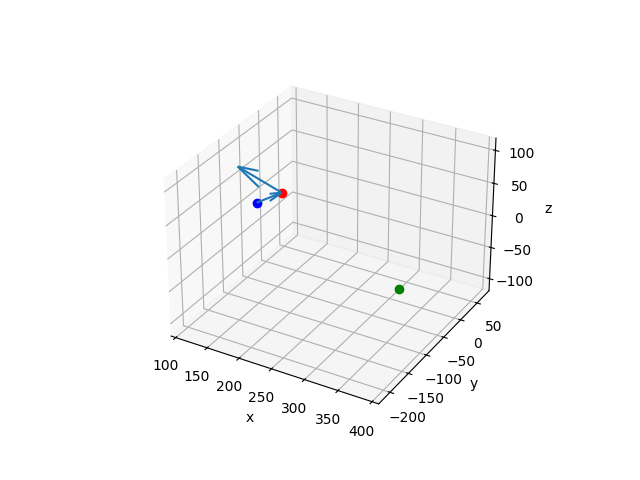

In [2]:
vec = np.array([-389.51162880687355,142.51174360659186,0.9286051327794733])
length = np.linalg.norm(vec)
vec_norm = vec / length
print(length,vec_norm)

pt_g = -120 / vec_norm[0] * np.array([1,0,0])
diff_vec = pt_g + 120 * vec_norm
value = np.dot(diff_vec,vec_norm)
print(value, pt_g)

plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pt_g[0],pt_g[1],pt_g[2],'ro')
ax.plot(-120*vec_norm[0],-120*vec_norm[1],-120*vec_norm[2],'bo')
ax.plot(-vec[0],-vec[1],-vec[2],'go')

ax.quiver(pt_g[0],pt_g[1],pt_g[2],vec_norm[0],vec_norm[1],vec_norm[2], length=100, normalize=True, arrow_length_ratio=0.5)
ax.quiver(-120*vec_norm[0],-120*vec_norm[1],-120*vec_norm[2],diff_vec[0],diff_vec[1],diff_vec[2], length=np.linalg.norm(diff_vec), normalize=True, arrow_length_ratio=0.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axis('equal')

In [5]:
file = '../../test/inputs/test_Camera/cam1_refract.txt'
cam = lpt.math.Camera(file)

file_ref = '../../test/inputs/test_Camera/cam1.txt'
cam_ref = lpt.math.Camera(file_ref)

In [6]:
pt_world = lpt.math.Pt3D(10,10,10)

# projection
result = cam.refractPlate(pt_world)
print(result[0])
print(result[2])
print(result[1].to_dict())

pt2d = cam.project(pt_world, False)  
print(pt2d.to_dict())
pt2d_ref = cam_ref.project(pt_world)
print(pt2d_ref.to_dict())

# line of sight
line = cam.lineOfSight(pt2d)
dist = lpt.math.dist(pt_world, line)
print(dist)

line_ref = cam_ref.lineOfSight(pt2d_ref)
dist_ref = lpt.math.dist(pt_world, line_ref)
print(dist_ref)

dist_refract = lpt.math.dist(result[1], line_ref)
print(dist_refract)

False
3.4831023556821995e-17
{'data (no_access)': array([[127.93982992],
       [-36.57186175],
       [  7.20832314]])}
{'data (no_access)': array([[168.42095582],
       [247.34353906]])}
{'data (no_access)': array([[196.08085254],
       [268.6308008 ]])}
1.2105556876856248e-08
5.407606310517359e-13
0.9693843725787298


In [11]:
line_pt = lpt.math.matrix_to_numpy(line.pt)
line_vec = lpt.math.matrix_to_numpy(line.unit_vector)

vec_1 = lpt.math.matrix_to_numpy(pt_world) - line_pt
dist = np.sqrt((vec_1.T @ vec_1) - (vec_1.T @ line_vec) ** 2)
dist

array([[9.39117395]])

In [25]:
value = 0
cross_vec = np.array([
    line_vec[1] * vec_1[2] - line_vec[2] * vec_1[1],
    line_vec[2] * vec_1[0] - line_vec[0] * vec_1[2],
    line_vec[0] * vec_1[1] - line_vec[1] * vec_1[0]
])
cross_vec - np.cross(line_vec, lpt.math.matrix_to_numpy(pt_world) - line_pt, axis=0)

array([[0.],
       [0.],
       [0.]])

In [8]:
cam._pinplate_param.lr

0.5

In [54]:
line_vec = lpt.math.createUnitVector(cam._pinplate_param.t_vec_inv, cam._pinplate_param.pt3d_closest)
line = lpt.math.Line3D(cam._pinplate_param.t_vec_inv, line_vec)
plane = cam._pinplate_param.plane
plane.pt = cam._pinplate_param.pt3d_closest

pt3d_plane = lpt.math.crossPoint(line, plane)[0]
pt3d_plane.to_dict()

{'data (no_access)': array([[ 1.39706679e+02],
        [-4.36367669e+00],
        [-2.84336490e-02]])}